In [1]:
# initial imports
from random import randrange
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

The  function `find_a_match()` uses `randrange()` to randomly pick a 'day' numbered between 1 and 365 and places it in the list `so_far`. It keeps on doing this until the day it has just picked matches an item that is already in `so_far`. The function returns an integer `count` which is the number of days it had to pick before getting a match.

In [2]:
def find_a_match(verbose=False):
    """
    Return a count of the number of times needed to randomly select a value
    from [1,365] until we get a matched value.
    """
    repeat = True
    so_far = []
    while repeat:
        day = randrange(1, 366) # pick a random day
        if day in so_far: # if True, we have a match    
            count = len(so_far) + 1    #we add 1 to the count because it doesn't yet contain the new day
            if verbose:
                print("Days: {} + {}\nCount of picks: {}".format(so_far, day, count))
            repeat = False        
        else:
            so_far.append(day)            
    return count

By the law of large numbers, we need to run `find_a_match()` a fair number of times to get a reasonable simulation. This is what `run_experiment()` does. It returns a list `counts` consisting of the output of each execution of `find_a_match()`.

In [3]:
def run_experiment(n=1000):
    """
    Run the :meth:`find_a_match()` function `n` times and add the result to the list `counts`.
    """
    counts = []
    for i in range(n):
        count = find_a_match()
        counts.append(count)
    return counts

Here's an example of the output from executing `run_experiment()` 100 times.

In [4]:
print(run_experiment(100))

[27, 24, 38, 10, 43, 4, 51, 16, 9, 19, 25, 6, 25, 11, 23, 40, 24, 10, 9, 21, 15, 23, 21, 24, 19, 23, 29, 18, 10, 13, 27, 35, 21, 29, 18, 35, 40, 18, 16, 38, 38, 32, 4, 28, 9, 11, 38, 22, 27, 19, 16, 14, 28, 19, 24, 15, 25, 49, 30, 19, 31, 10, 11, 40, 23, 17, 56, 20, 12, 17, 27, 30, 18, 41, 8, 41, 8, 9, 15, 34, 34, 43, 13, 50, 28, 21, 16, 18, 24, 28, 8, 36, 25, 11, 20, 9, 34, 15, 12, 20]


Let's do it a million times and store the result in the variable `counts`. We use `%%time` to monitor how long this takes.

In [5]:
%%time

counts = run_experiment(1000000)

CPU times: user 29.4 s, sys: 166 ms, total: 29.5 s
Wall time: 29.7 s


Now let's put those counts into a histogram with 100 bins.

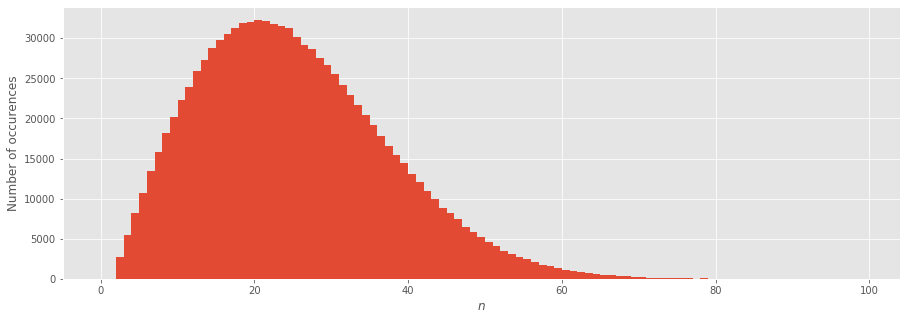

In [6]:
fig=plt.figure(figsize=(15, 5))
plt.xlabel("$n$")
plt.ylabel("Number of occurences")
counts_histogram = plt.hist(counts, bins = np.arange(0,100))
plt.show()

The histogram `counts_histogram` just shows the number of times that each `count` of people required before we got a matching birthday. For example, we can check how many times we needed 15 people before we got a match.

In [7]:
counts_histogram[0][15]

29765.0

In order to turn these counts into probabilities, we need to divide them by the total number of times we ran our experiment, that is, by one million. The `matplotlib` histogram can do this for us if we add the keyword `density` as show below.

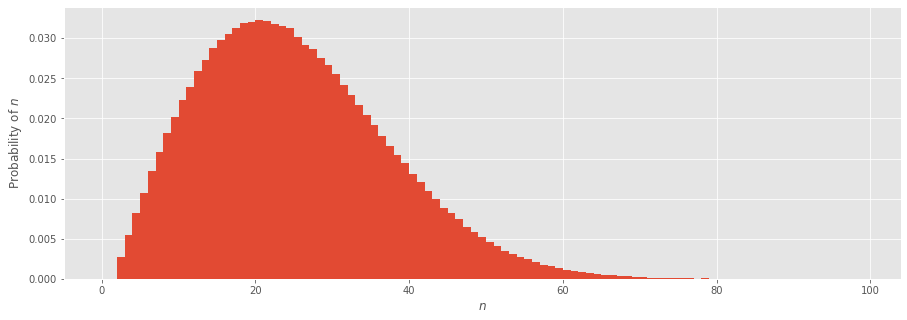

In [8]:
fig=plt.figure(figsize=(15, 5))
plt.xlabel("$n$")
plt.ylabel("Probability of $n$")
approx_dist = plt.hist(counts, bins = np.arange(0,100), density = True)
plt.show()

We can now add up these probabilities to figure out how many people we need to see to get say a 50% chance of finding matched birthdays. The numpy `cumsum()` function  gives us an easy way to get this sum.

In [9]:
print("50% of time, no more than {} people were needed for a repeat.".format(
            np.where(np.cumsum(approx_dist[0])>0.5)[0][0]
            )
      )

50% of time, no more than 23 people were needed for a repeat.
